### 手写识别的例子

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [11]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [12]:
example_digits = noisy_digits[y == 0,:][:10]
for num in range(1, 10):
  X_num = noisy_digits[y == num,:][:10]
  example_digits = np.vstack([example_digits, X_num])

In [13]:
def plot_digits(data):
  fig, axes = plt.subplots(10, 10, figsize =(10, 10), 
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8), cmap ='binary', interpolation = 'nearest',clim=(0,16))
  plt.show()

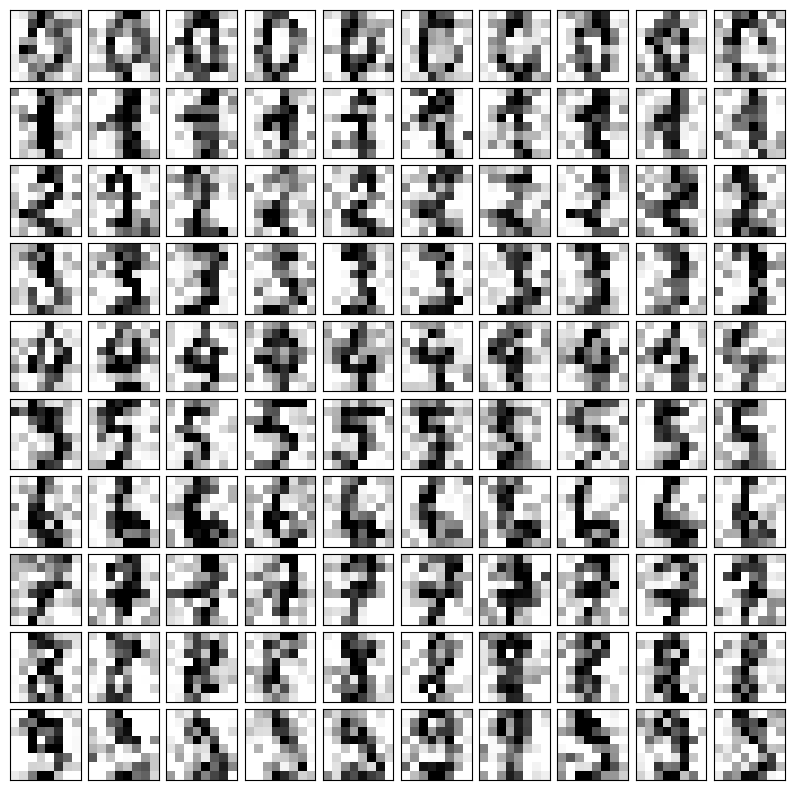

In [14]:
plot_digits(example_digits)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [16]:
pca.n_components_

12

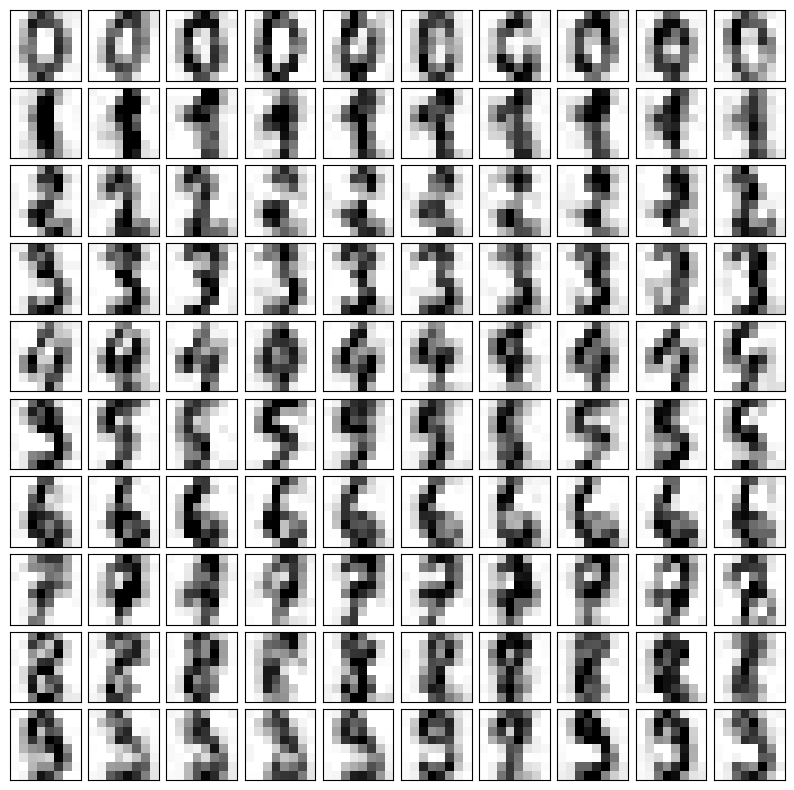

In [17]:
components = pca.transform(example_digits)
filtered_digits =  pca.inverse_transform(components)

plot_digits(filtered_digits)